#### Name: K Lalith Aditya
#### MDSC-301: Stochastic Process Lab
#### 21 July 2023
Assignment 1

#Qn 2.23.
 R : Simulate the first 20 letters (vowel/consonant) of the Pushkin poem Markov chain of Example 2.2.

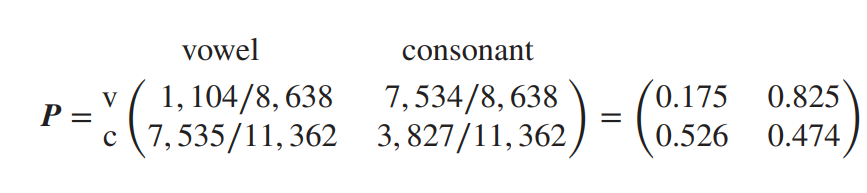

In [1]:
install.packages("remotes")  # Install the remotes package (if not already installed)
remotes::install_version("markovchain", version = "0.8.5", repos = "http://cran.us.r-project.org")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Rcpp         (NA    -> 1.0.11    ) [CRAN]
cpp11        (0.4.4 -> 0.4.5     ) [CRAN]
RcppArmad... (NA    -> 0.12.4.1.0) [CRAN]
RcppParallel (NA    -> 5.1.7     ) [CRAN]
expm         (NA    -> 0.999-7   ) [CRAN]
matlab       (NA    -> 1.0.4     ) [CRAN]
igraph       (NA    -> 1.5.0.1   ) [CRAN]


Installing 7 packages: Rcpp, cpp11, RcppArmadillo, RcppParallel, expm, matlab, igraph

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘RcppArmadillo’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘igraph’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/Rtmp3CnJlO/remotesaba4b344d98/markovchain’ had non-zero exit status”


In [2]:
# The given transition matrix will be

vector_data <- c(0.175,0.825, 0.526,0.474)

matrix_data <- matrix(vector_data, nrow = 2, ncol = 2,byrow=TRUE)

print(matrix_data)

      [,1]  [,2]
[1,] 0.175 0.825
[2,] 0.526 0.474


In [3]:
require(matrixcalc)
library(expm)


Loading required package: matrixcalc

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘matrixcalc’”
Loading required package: Matrix


Attaching package: ‘expm’


The following object is masked from ‘package:Matrix’:

    expm




In [4]:
# The above is the transition matrix from the example 2.2

ans <- matrix_data %^% 20
ans

0.3893412,0.6106588
0.3893412,0.6106588


#Qn 2.24.
 R : Simulate 50 steps of the random walk on the graph in Figure 2.1. Repeat the simulation 10 times. How many of your simulations end at vertex c? Compare with the exact long-term probability the walk visits c.

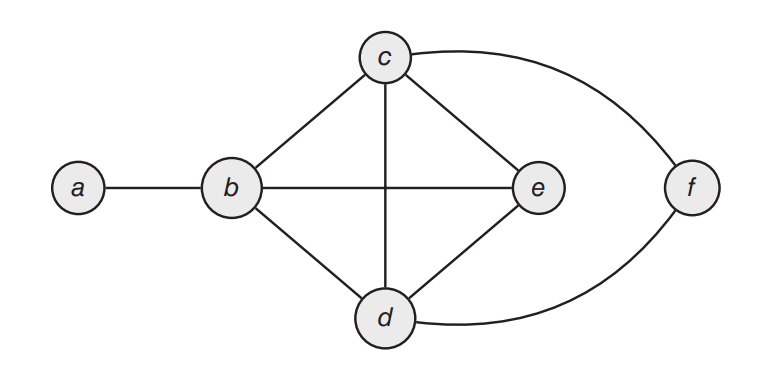

In [5]:
# For the above graph the transition matrix would be

vector_data <- c(0,1,0,0,0,0, 1/4,0,1/4,1/4,1/4,0, 0,1/4,0,1/4,1/4,1/4, 0,1/4,1/4,0,1/4,1/4, 0,1/3,1/3,1/3,0,0, 0,0,1/2,1/2,0,0)
transition_matrix <- matrix(vector_data,nrow=6,ncol=6,byrow=TRUE)
print(transition_matrix)


     [,1]      [,2]      [,3]      [,4] [,5] [,6]
[1,] 0.00 1.0000000 0.0000000 0.0000000 0.00 0.00
[2,] 0.25 0.0000000 0.2500000 0.2500000 0.25 0.00
[3,] 0.00 0.2500000 0.0000000 0.2500000 0.25 0.25
[4,] 0.00 0.2500000 0.2500000 0.0000000 0.25 0.25
[5,] 0.00 0.3333333 0.3333333 0.3333333 0.00 0.00
[6,] 0.00 0.0000000 0.5000000 0.5000000 0.00 0.00


In [6]:
# Function to perform random walk on the graph
random_walk <- function(transition_matrix, num_steps, start_vertex) {
  n_states <- nrow(transition_matrix)
  current_vertex <- start_vertex
  walk <- numeric(num_steps)

  for (step in 1:num_steps) {
    walk[step] <- current_vertex
    current_vertex <- sample(1:n_states, 1, prob = transition_matrix[current_vertex, ])
  }

  return(walk)
}

# Number of random walks to simulate
num_simulations <- 10

# Number of steps in each random walk
num_steps <- 50

# Start vertex for the random walk
start_vertex <- 1

# Variable to count the number of times the walk ends at vertex c (vertex 3)
num_walks_at_vertex_c <- 0

# Perform the simulations and count the number of walks ending at vertex c
for (i in 1:num_simulations) {
  walk <- random_walk(transition_matrix, num_steps, start_vertex)

  # Check if the last vertex in the walk is vertex c (vertex 3)
  if (tail(walk, 1) == 3) {
    num_walks_at_vertex_c <- num_walks_at_vertex_c + 1
  }
}

# Calculate the exact long-term probability of visiting vertex c (vertex 3)
exact_probability_vertex_c <- transition_matrix[start_vertex, 3]

# Print the results
cat("Number of simulations ending at vertex c:", num_walks_at_vertex_c, "\n")
cat("Exact long-term probability of visiting vertex c:", exact_probability_vertex_c, "\n")


Number of simulations ending at vertex c: 3 
Exact long-term probability of visiting vertex c: 0 


# Qn 2.25
R : The behavior of dolphins in the presence of tour boats in Patagonia, Argentina is studied in Dans et al. (2012). A Markov chain model is developed, with state space consisting of ive primary dolphin activities (socializing, traveling, milling, feeding, and resting). The following transition matrix is obtained.

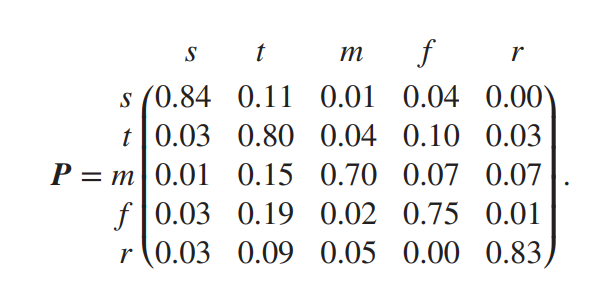

Use technology to estimate the long-term distribution of dolphin activity.

In [7]:
# constructing the transition matrix

vector_data <- c(0.84,0.11,0.01,0.04,0, 0.03,0.8,0.04,0.1,0.03, 0.01,0.15,0.7,0.07,0.07, 0.03,0.19,0.02,0.75,0.01, 0.03,0.09,0.05,0,0.83)
transition_matrix <-matrix(vector_data, nrow=5, ncol=5, byrow=TRUE)

# alpha matrix since there are 5 entities

a <- c(1/5,1/5,1/5,1/5,1/5)

alpha <- matrix(a,nrow=1,ncol=5,byrow=TRUE)

limiting_value <- 50
for(i in 1:limiting_value)
{
  alpha <- alpha %*% transition_matrix
}
alpha

0.1478367,0.414924,0.09555989,0.216379,0.1253005


Chances for the long term activity by the dolphins is:
Travelling - 0.4149
feeding - 0.2163
socializing - 0.1478
resting - 0.1252
milling - 0.0955

# Qn 2.26
R : In computer security applications, a honeypot is a trap set on a network to detect and counteract computer hackers. Honeypot data are studied in Kimou et al. (2010) using Markov chains. The authors obtain honeypot data from a central database and observe attacks against four computer ports—80, 135, 139, and 445—over 1 year. The ports are the states of a Markov chain along with a state corresponding to no port is attacked. Weekly data are monitored, and the port most often attacked during the week is recorded. The estimated Markov transition matrix for weekly attacks is


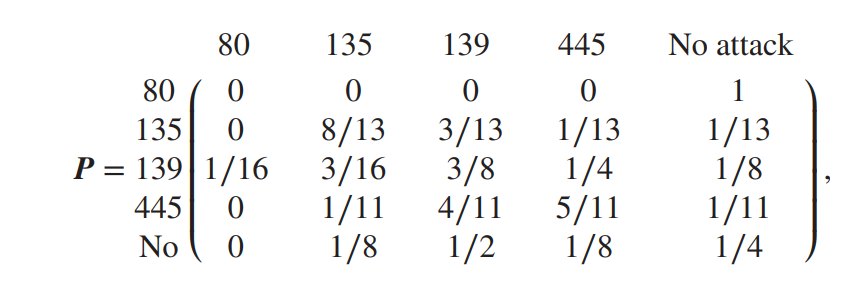

with initial distribution   = (0, 0, 0, 0, 1). (a) Which are the least and most likely attacked ports after 2 weeks? (b) Find the long-term distribution of attacked ports

In [8]:
# Ans a
vec <- c(0,0,0,0,1, 0,8/13,3/13,1/13,1/13, 1/16,3/16,3/8,1/4,1/8, 0,1/11,4/11,5/11,1/11, 0,1/8,1/2,1/8,1/4)
trans_matrix <- matrix(vec,nrow=5,ncol=5,byrow=TRUE)
a_vec <- c(0,0,0,0,1)
alpha <- matrix(a_vec,nrow=1,ncol=5,byrow = TRUE)

p_square <- trans_matrix %*% trans_matrix
answer <- alpha %*% trans_matrix

In [9]:
answer

0,0.125,0.5,0.125,0.25


So from the above answer the least attacked ports are 80 and the most likely attacked is 139 port.

In [10]:
# Ans b

limiting_value <- 10

while(i<=limiting_value){
  alpha <- alpha %*% trans_matrix
}
alpha

0,0,0,0,1


For long the long term the port 139 is more likely to be attacked.

# Qn 2.27
R : See gamblersruin.R. Simulate gambler’s ruin for a gambler with initial stake $2, playing a fair game.

(a) Estimate the probability that the gambler is ruined before he wins $5.

(b) Construct the transition matrix for the associated Markov chain. Estimate the desired probability in :
   (a) by taking high matrix powers.
  
(c) Compare your results with the exact probability

In [11]:
# Function for gamblers ruin
gamblers_ruin <- function(init_stake, target, simulations) {
  my_list <- character(num_simulations)
  for (i in 1:simulations) {
    stake <- init_stake

    while (stake > 0 && stake < target) {
      if (runif(1) < 0.5) {
        stake <- stake + 1
      } else {
        stake <- stake - 1
      }
    }

    if (stake == 0) {
      my_list[i] <- 1
    } else {
      my_list[i] <- 0
    }
  }
  count <- sum(unlist(my_list) == 1)
  return(count/simulations)
}




In [13]:
# (a) Estimate the probability that the gambler is ruined before winning $5
initial_stake <- 2
target_win <- 5
num_simulations <- 100000
probability_ruin <- gamblers_ruin(initial_stake, target_win, num_simulations)
print(probability_ruin)

[1] 0.6013


In [14]:
# (b) Construct the transition matrix for the associated Markov chain. Estimate the desired probability in : (a) by taking high matrix powers.
initial_stake <- 2  # Initial stake of the gambler
target_amount <- 10  # Target amount to reach
p <- 0.5  # Probability of winning $1
q <- 1 - p  # Probability of losing $1

simulator <- function(stake, target, prob_win) {
  while (stake > 0 && stake < target) {
    if (runif(1) < prob_win) {
      stake <- stake + 1
    } else {
      stake <- stake - 1
    }
  }
  return(stake == target)
}

# Run the simulation for a large number of times
num_simulations <- 10000
results <- replicate(num_simulations, simulator(initial_stake, target_amount, p))

# Estimate the desired probability
desired_probability <- mean(results)
print(paste("Estimated probability:", desired_probability))


# Initialize the transition matrix
transition_matrix <- matrix(0, nrow = target_amount + 1, ncol = target_amount + 1)

# Fill in the transition probabilities
for (i in 1:target_amount) {
  transition_matrix[i, i+1] <- p
  transition_matrix[i, i-1] <- q
}

# Boundary conditions for the target and 0 states
transition_matrix[target_amount, target_amount] <- 1
transition_matrix[1, 1] <- 1

# Print the transition matrix
print("Transition matrix:")
print(transition_matrix)


[1] "Estimated probability: 0.203"
[1] "Transition matrix:"
      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11]
 [1,]  1.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0
 [2,]  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0
 [3,]  0.0  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0   0.0   0.0
 [4,]  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0  0.0   0.0   0.0
 [5,]  0.0  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0   0.0   0.0
 [6,]  0.0  0.0  0.0  0.0  0.5  0.0  0.5  0.0  0.0   0.0   0.0
 [7,]  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.5  0.0   0.0   0.0
 [8,]  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.5   0.0   0.0
 [9,]  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0   0.5   0.0
[10,]  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5   1.0   0.5
[11,]  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0


In [15]:
# Calculate the exact probability
exact_probability <- (1 - (initial_stake / target_amount))^initial_stake

# Print the results
print(paste("Estimated probability from simulation:", desired_probability))
print(paste("Exact probability:", exact_probability))


[1] "Estimated probability from simulation: 0.203"
[1] "Exact probability: 0.64"
